In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier,plot_tree,export_graphviz
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,ConfusionMatrixDisplay,cohen_kappa_score,classification_report, roc_auc_score, roc_curve
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier
from sklearn.preprocessing import minmax_scale

In [7]:
# Load dataset from ZIP (update path if needed)
online = pd.read_csv('D:/data/online_fraud detection.csv')
online

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [9]:
# Convert all column names to lowercase
online.columns = [col.lower() for col in online.columns]
online.columns

Index(['step', 'type', 'amount', 'nameorig', 'oldbalanceorg', 'newbalanceorig',
       'namedest', 'oldbalancedest', 'newbalancedest', 'isfraud',
       'isflaggedfraud'],
      dtype='object')

In [11]:
online.head()

,step,type,amount,nameorig,oldbalanceorg,newbalanceorig,namedest,oldbalancedest,newbalancedest,isfraud,isflaggedfraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [13]:
online.shape

(6362620, 11)

In [15]:
online.columns

Index(['step', 'type', 'amount', 'nameorig', 'oldbalanceorg', 'newbalanceorig',
       'namedest', 'oldbalancedest', 'newbalancedest', 'isfraud',
       'isflaggedfraud'],
      dtype='object')

In [17]:
# Overview
print(online.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameorig        object 
 4   oldbalanceorg   float64
 5   newbalanceorig  float64
 6   namedest        object 
 7   oldbalancedest  float64
 8   newbalancedest  float64
 9   isfraud         int64  
 10  isflaggedfraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB
None


In [19]:
online.shape

(6362620, 11)

In [21]:
online.describe()

,step,amount,oldbalanceorg,newbalanceorig,oldbalancedest,newbalancedest,isfraud,isflaggedfraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [23]:
# Class imbalance check
print("isFraud distribution:\n", online['isfraud'].value_counts())
#print("isFlaggedFraud distribution:\n", online['isflaggedfraud'].value_counts())

isFraud distribution:
 isfraud
0    6354407
1       8213
Name: count, dtype: int64


In [25]:
# Check for null values and duplicates
print("Missing values:\n", online.isnull().sum())
print("Duplicates:", online.duplicated().sum())

Missing values:
 step              0
type              0
amount            0
nameorig          0
oldbalanceorg     0
newbalanceorig    0
namedest          0
oldbalancedest    0
newbalancedest    0
isfraud           0
isflaggedfraud    0
dtype: int64
Duplicates: 0


In [26]:
# Preview columns
# Drop only if present
for col in ['nameorig', 'namedest','isflaggedfraud']:
    if col in online.columns:
        online.drop(col, axis=1, inplace=True)

In [27]:
online.columns,online.shape

(Index(['step', 'type', 'amount', 'oldbalanceorg', 'newbalanceorig',
        'oldbalancedest', 'newbalancedest', 'isfraud'],
       dtype='object'),
 (6362620, 8))

In [31]:
encoding=LabelEncoder()
online['type']=encoding.fit_transform(online['type'])
online                                                      # alphabetcal encoding happening here
online.type.value_counts()

type
1    2237500
3    2151495
0    1399284
4     532909
2      41432
Name: count, dtype: int64

In [32]:
online

,step,type,amount,oldbalanceorg,newbalanceorig,oldbalancedest,newbalancedest,isfraud
0,1,3,9839.64,170136.00,160296.36,0.00,0.00,0
1,1,3,1864.28,21249.00,19384.72,0.00,0.00,0
2,1,4,181.00,181.00,0.00,0.00,0.00,1
3,1,1,181.00,181.00,0.00,21182.00,0.00,1
4,1,3,11668.14,41554.00,29885.86,0.00,0.00,0
...,...,...,...,...,...,...,...,...
6362615,743,1,339682.13,339682.13,0.00,0.00,339682.13,1
6362616,743,4,6311409.28,6311409.28,0.00,0.00,0.00,1
6362617,743,1,6311409.28,6311409.28,0.00,68488.84,6379898.11,1
6362618,743,4,850002.52,850002.52,0.00,0.00,0.00,1


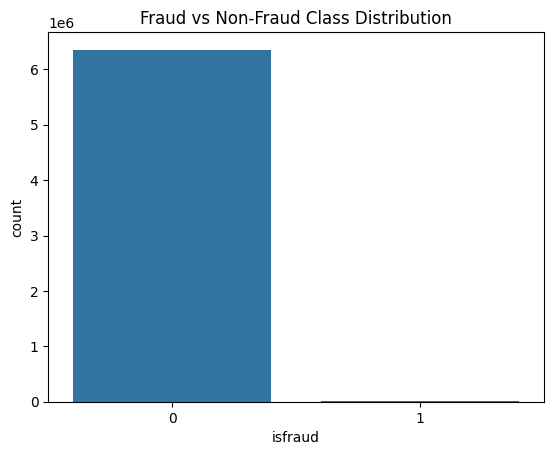

In [35]:
# Class distribution plot
sns.countplot(x=online['isfraud'],)
plt.title("Fraud vs Non-Fraud Class Distribution")
plt.show()

In [36]:
# # List of selected features to analyze
# selected_features = ['amount', 'oldbalanceorg', 'newbalanceorig', 'oldbalancedest', 'newbalancedest']

# # Create subplots (number of subplots is equal to the number of selected features)
# fig, axes = plt.subplots(1, len(selected_features), figsize=(20, 5))

# # Loop through each selected feature to create individual bar plots
# for i, feature in enumerate(selected_features):
#     sns.barplot(x='isfraud', y=feature,hue='isfraud', data=online, ax=axes[i])
#     sns.barplot(x='isfraud', y=feature, hue='isfraud', data=online, ax=axes[i], palette="Set2")
#     axes[i].set_title(f'{feature} vs isFraud')  # Title for each subplot
#     axes[i].set_xlabel('isfraud') 
#     axes[i].set_ylabel(feature)  

# # Add a title for the overall figure and adjust layout for better spacing
# plt.suptitle("Comparison of Selected Features with Target (Bar Plot)", fontsize=16)
# plt.tight_layout(rect=[0, 0, 1, 0.95])  
# plt.show() 

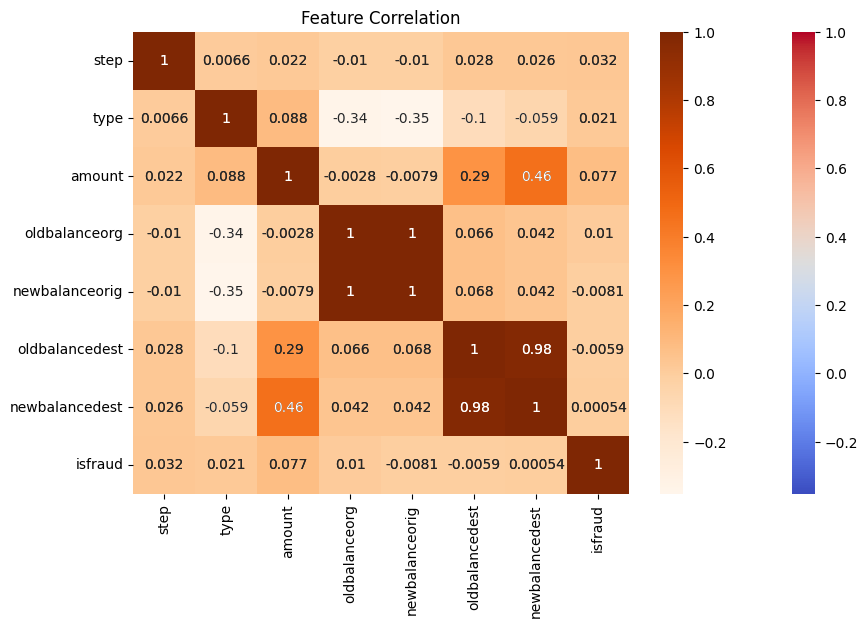

In [37]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(online.corr(), annot=True, cmap="coolwarm")
sns.heatmap(online.corr(), annot=True, cmap="Oranges")
plt.title("Feature Correlation")
plt.show()

In [38]:
6353880+8197-6362620

-543

In [39]:
#  Separate fraud and non-fraud
fraud = online[online['isfraud'] == 1]
nonfraud = online[online['isfraud'] == 0]

#  Check class counts
print(f"Fraud count: {len(fraud)}")
print(f"Non-fraud count: {len(nonfraud)}")

#  Downsample non-fraud to match fraud count
nonfraud_down = nonfraud.sample(n=len(fraud),random_state=42)

#  Combine and shuffle the balanced dataset
balanced_data = pd.concat([fraud, nonfraud_down], ignore_index=True).sample(frac=1, random_state=42)

#  Create features and labels
X = balanced_data.drop('isfraud', axis=1)
y = balanced_data['isfraud']

#  Confirm label distribution
print("Class distribution in y:\n", y.value_counts())

Fraud count: 8213
Non-fraud count: 6354407
Class distribution in y:
 isfraud
0    8213
1    8213
Name: count, dtype: int64


In [40]:
X

,step,type,amount,oldbalanceorg,newbalanceorig,oldbalancedest,newbalancedest
13724,397,0,76550.74,1096252.93,1172803.66,2208784.02,2132233.28
12284,251,3,12617.11,339181.87,326564.76,0.00,0.00
1163,98,1,8055.06,8055.06,0.00,0.00,8055.06
6057,550,4,342309.91,342309.91,0.00,0.00,0.00
6492,586,1,2581549.92,2581549.92,0.00,0.00,2581549.92
...,...,...,...,...,...,...,...
11284,382,1,542461.74,0.00,0.00,1757516.20,2299977.94
11964,40,0,2032.93,7625673.00,7627705.93,323961.50,321928.56
5390,484,1,156220.74,156220.74,0.00,0.00,156220.74
860,71,4,1871553.73,1871553.73,0.00,0.00,0.00


In [41]:
y

13724    0
12284    0
1163     1
6057     1
6492     1
        ..
11284    0
11964    0
5390     1
860      1
15795    0
Name: isfraud, Length: 16426, dtype: int64

In [44]:
balanced_data

,step,type,amount,oldbalanceorg,newbalanceorig,oldbalancedest,newbalancedest,isfraud
13724,397,0,76550.74,1096252.93,1172803.66,2208784.02,2132233.28,0
12284,251,3,12617.11,339181.87,326564.76,0.00,0.00,0
1163,98,1,8055.06,8055.06,0.00,0.00,8055.06,1
6057,550,4,342309.91,342309.91,0.00,0.00,0.00,1
6492,586,1,2581549.92,2581549.92,0.00,0.00,2581549.92,1
...,...,...,...,...,...,...,...,...
11284,382,1,542461.74,0.00,0.00,1757516.20,2299977.94,0
11964,40,0,2032.93,7625673.00,7627705.93,323961.50,321928.56,0
5390,484,1,156220.74,156220.74,0.00,0.00,156220.74,1
860,71,4,1871553.73,1871553.73,0.00,0.00,0.00,1


In [45]:
fraud.value_counts(), nonfraud.value_counts()

(step  type  amount       oldbalanceorg  newbalanceorig  oldbalancedest  newbalancedest  isfraud
 617   1     10000000.00  10000000.00    0.0             0.00            10000000.00     1          4
 387   1     10000000.00  10000000.00    0.0             0.00            10000000.00     1          4
 646   1     10000000.00  10000000.00    0.0             0.00            10000000.00     1          3
             0.00         0.00           0.0             0.00            0.00            1          2
 279   1     10000000.00  10000000.00    0.0             0.00            10000000.00     1          2
                                                                                                   ..
 241   4     57734.59     57734.59       0.0             0.00            0.00            1          1
       1     1282731.68   1282731.68     0.0             0.00            1282731.68      1          1
             1061482.24   1061482.24     0.0             122332.23       1183814.46    

In [52]:
#  Train-test split with stratify
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,shuffle=True, random_state=45, stratify=y)
#X_train,X_test,y_train,y_test=train_test_split(X,y,shuffle=True,test_size=0.2,random_state=45)
#  Final shapes
print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")

Train shape: (13140, 7), Test shape: (3286, 7)


In [106]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((13140, 7), (3286, 7), (13140,), (3286,))

In [53]:
balanced_data.shape,nonfraud_down.shape,fraud.shape

((16426, 8), (8213, 8), (8213, 8))

In [54]:
# making model and training 

In [98]:
model=DecisionTreeClassifier(criterion='entropy',max_depth=10,max_leaf_nodes=20,splitter='random')
model.fit(X_train,y_train)

,criterion,'entropy'
,splitter,'random'
,max_depth,10
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,20
,min_impurity_decrease,0.0
,class_weight,None


In [100]:
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

In [102]:
model.score(X_train,y_train),model.score(X_test,y_test)

(0.9176560121765601, 0.9190505173463177)

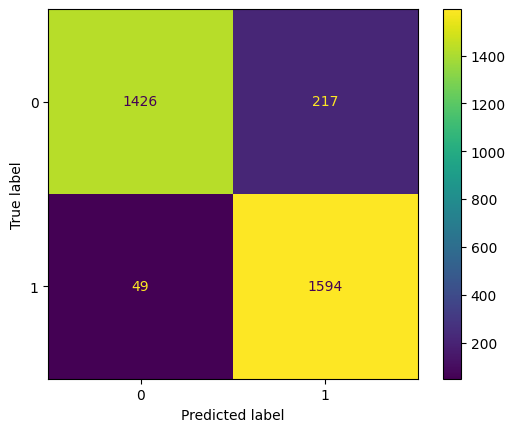

In [104]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)
plt.show()

In [108]:
print(" Accuracy:", accuracy_score(y_test, y_pred))

 Accuracy: 0.9190505173463177


In [110]:
y_proba = model.predict_proba(X_test)[:, 1]

In [112]:
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))

ROC AUC Score: 0.9764233367624281


In [393]:
model.get_depth(),model.get_n_leaves()

(10, 20)

In [395]:
model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 10,
 'max_features': None,
 'max_leaf_nodes': 20,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'random'}

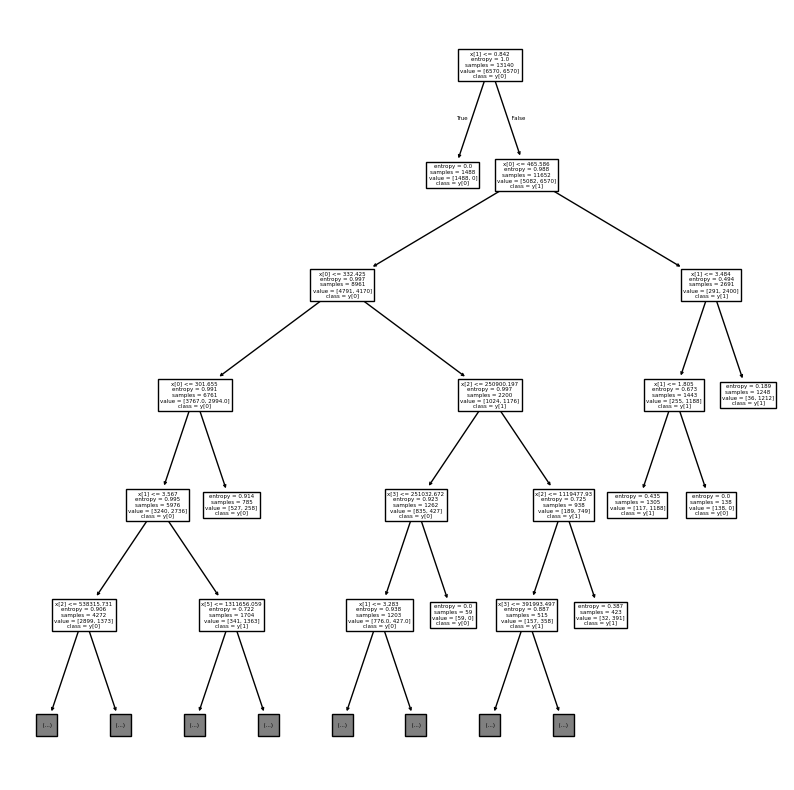

In [84]:
plt.figure(figsize=[10,10])
plot_tree(model,max_depth=5,class_names=True)[1]
plt.show()

In [96]:
xyz=export_graphviz(model,max_depth=7)
xyz

'digraph Tree {\nnode [shape=box, fontname="helvetica"] ;\nedge [fontname="helvetica"] ;\n0 [label="x[1] <= 0.842\\nentropy = 1.0\\nsamples = 13140\\nvalue = [6570, 6570]"] ;\n1 [label="entropy = 0.0\\nsamples = 1488\\nvalue = [1488, 0]"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="x[0] <= 465.586\\nentropy = 0.988\\nsamples = 11652\\nvalue = [5082, 6570]"] ;\n0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;\n3 [label="x[0] <= 332.425\\nentropy = 0.997\\nsamples = 8961\\nvalue = [4791, 4170]"] ;\n2 -> 3 ;\n9 [label="x[0] <= 301.655\\nentropy = 0.991\\nsamples = 6761\\nvalue = [3767.0, 2994.0]"] ;\n3 -> 9 ;\n25 [label="x[1] <= 3.567\\nentropy = 0.995\\nsamples = 5976\\nvalue = [3240, 2736]"] ;\n9 -> 25 ;\n27 [label="x[2] <= 538315.731\\nentropy = 0.906\\nsamples = 4272\\nvalue = [2899, 1373]"] ;\n25 -> 27 ;\n29 [label="x[1] <= 2.684\\nentropy = 0.74\\nsamples = 3638\\nvalue = [2877, 761]"] ;\n27 -> 29 ;\n31 [label="entropy = 0.923\\nsamples

In [556]:
model1= RandomForestClassifier(n_estimators=100,bootstrap=True)
model1.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99      1643
           1       0.99      1.00      0.99      1643

    accuracy                           0.99      3286
   macro avg       0.99      0.99      0.99      3286
weighted avg       0.99      0.99      0.99      3286

ROC AUC Score: 0.9995187906865439


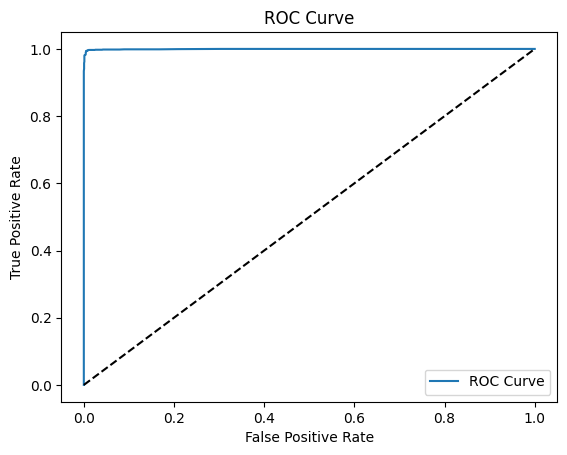

In [557]:
# Predict and probability
y_pred1 = model1.predict(X_test)
y_proba1 = model1.predict_proba(X_test)[:, 1]
# Metrics
print("Classification Report:\n", classification_report(y_test, y_pred1))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba1))
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba1)
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [560]:
# model1.max_depth  #,model.get_n_leaves()

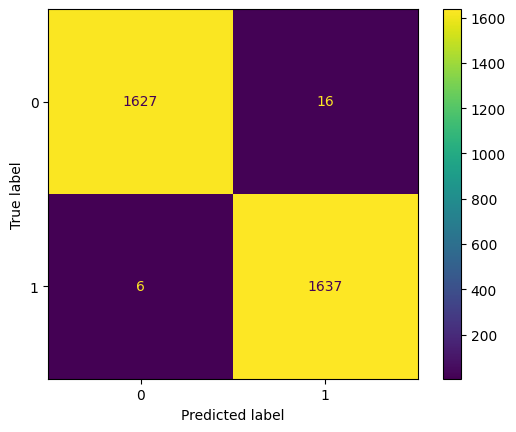

In [562]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred1)
plt.show()

In [407]:
print('Accuracy score',accuracy_score(y_test,y_pred1))
#print(" Balanced Accuracy score:", balanced_accuracy_score(y_test, y_pred1))

Accuracy score 0.9936092513694461


In [409]:
#X_train,X_test,y_train,y_test=train_test_split(X,y,shuffle=True,test_size=0.2,random_state=45)

In [411]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((13140, 7), (3286, 7), (13140,), (3286,))

In [414]:
# we can do scaling from minmax scaling if needed

In [416]:
model2=KNeighborsClassifier(n_neighbors=3,weights='distance',p=2)  # p=2 euclidean distance p=1 manhattan distance
model2.fit(X_train,y_train)

,n_neighbors,3
,weights,'distance'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [418]:
y_pred2=model2.predict(X_test)

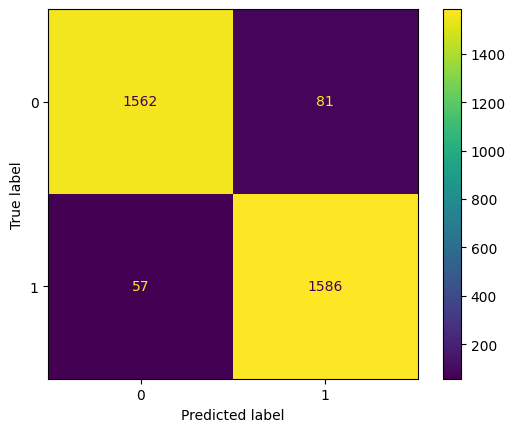

In [420]:
ConfusionMatrixDisplay.from_estimator(model2,X_test,y_test)
plt.show()

In [422]:
model2.score(X_test,y_test)

0.9580036518563603

In [424]:
# X_train_scaled=pd.DataFrame(minmax_scale(X_train),columns=X_train.columns)
# #X_train_scaled

# X_test_scaled=pd.DataFrame(minmax_scale(X_test),columns=X_test.columns)
# #X_test_scaled


In [426]:
model3=BaggingClassifier(estimator=KNeighborsClassifier(n_neighbors=3,weights='distance',p=2),
                         n_estimators=25,bootstrap=True,random_state=35)
model3.fit(X_train,y_train)

,estimator,KNeighborsCla...ts='distance')
,n_estimators,25
,max_samples,1.0
,max_features,1.0
,bootstrap,True
,bootstrap_features,False
,oob_score,False
,warm_start,False
,n_jobs,None
,random_state,35
,verbose,0


In [428]:
#model3.score(X_train,y_train),

In [430]:
y_predict3=model3.predict(X_test)
y_predict3

array([0, 0, 1, ..., 1, 0, 0], dtype=int64)

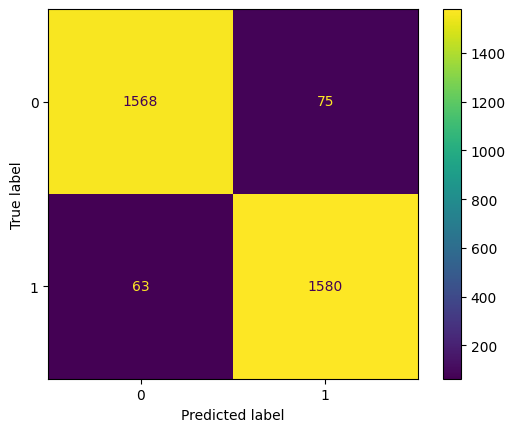

In [431]:
ConfusionMatrixDisplay.from_predictions(y_test,y_predict3)
plt.show()

In [434]:
model3.score(X_test,y_test) 

0.9580036518563603

In [436]:
estimators=model3.estimators_
estimators

[KNeighborsClassifier(n_neighbors=3, weights='distance'),
 KNeighborsClassifier(n_neighbors=3, weights='distance'),
 KNeighborsClassifier(n_neighbors=3, weights='distance'),
 KNeighborsClassifier(n_neighbors=3, weights='distance'),
 KNeighborsClassifier(n_neighbors=3, weights='distance'),
 KNeighborsClassifier(n_neighbors=3, weights='distance'),
 KNeighborsClassifier(n_neighbors=3, weights='distance'),
 KNeighborsClassifier(n_neighbors=3, weights='distance'),
 KNeighborsClassifier(n_neighbors=3, weights='distance'),
 KNeighborsClassifier(n_neighbors=3, weights='distance'),
 KNeighborsClassifier(n_neighbors=3, weights='distance'),
 KNeighborsClassifier(n_neighbors=3, weights='distance'),
 KNeighborsClassifier(n_neighbors=3, weights='distance'),
 KNeighborsClassifier(n_neighbors=3, weights='distance'),
 KNeighborsClassifier(n_neighbors=3, weights='distance'),
 KNeighborsClassifier(n_neighbors=3, weights='distance'),
 KNeighborsClassifier(n_neighbors=3, weights='distance'),
 KNeighborsCla

In [438]:
model3.classes_

array([0, 1], dtype=int64)

In [440]:
model3.n_estimators
model3.estimators_samples_

[array([ 9244, 12577,  8120, ...,  2851,  8125,  4218]),
 array([10743,  3143,  7950, ...,  4105,   814,  1430]),
 array([ 8595,  8432,  9841, ...,  1418,  8562, 12583]),
 array([ 2402,  1621,  5322, ..., 10254,  4665,  5406]),
 array([ 8568,  7897,  4446, ...,  7858, 10677,  1396]),
 array([10048,  4069,  3848, ...,  7594,  6940,  9657]),
 array([12046,  5781,  4061, ..., 11954,  3752, 12009]),
 array([12713,  5140, 11388, ..., 11646,  3565,  7018]),
 array([ 7462,  2211,  3307, ...,  3138, 12777,  3266]),
 array([  574,   207, 10844, ...,  7051, 10956, 10981]),
 array([ 6598, 11263,  3936, ...,  2438,  8412,  1272]),
 array([12079,  4962,  6700, ..., 12821,  1488, 11584]),
 array([ 2551, 10847, 12756, ...,  4499,  3657,  3769]),
 array([4820, 9929, 5243, ..., 4568, 5462, 2666]),
 array([ 1503,  1839,  8855, ..., 10909,  9261, 10998]),
 array([ 6789, 11429, 13029, ...,   769, 11391,  2826]),
 array([ 8369, 10289,  5768, ..., 11142, 10196, 10757]),
 array([ 7810,   759, 12078, ...,  81

In [534]:
from sklearn.linear_model import LogisticRegression

In [536]:
model4=LogisticRegression(max_iter=50)
model4.fit(X_train,y_train)

D:\anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 50 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=50).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,50
,multi_class,'deprecated'


In [538]:
model4.score(X_test,y_test)

0.9099208764455264

In [540]:
y_pred4=model4.predict(X_test)

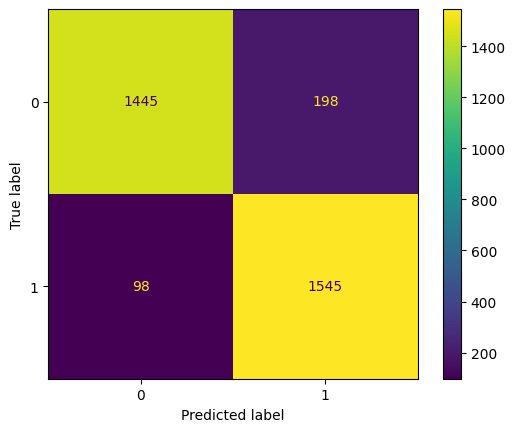

In [542]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred4)
plt.show()

In [544]:
w,b=model4.coef_[0],model4.intercept_
w,b

(array([-1.13865746e-03, -1.40876015e-05,  3.21025787e-06,  2.83013432e-05,
        -3.14855159e-05,  1.62852333e-05, -1.63516250e-05]),
 array([-6.07369225e-06]))